# Electric Vehicle Market Segmentation 

In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
pd.set_option('display.max_columns', None)

In [478]:
df1 = pd.read_csv("ElectricCarData.csv")

In [347]:
# BASIC INFORMATION ABOUT THE DATASET

In [348]:
df1.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [349]:
df1.shape

(103, 14)

In [350]:
# Missing Values 
df1.isna().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [351]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [352]:
df1.duplicated().sum()

0

In [353]:
# Converting Price to INR
for i in range(len(df1["PriceEuro"])):
    price = df1["PriceEuro"][i] * 88.12
    df1["PriceEuro"][i] = price

C:\Users\samar\AppData\Local\Temp\ipykernel_14256\799685615.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["PriceEuro"][i] = price


In [354]:
df1.rename({"PriceEuro":"PriceINR"},axis=1,inplace=True)

In [355]:
df1.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceINR
count,103.000000,103.000000,103.000000,103.000000,103.000000,1.030000e+02
mean,7.396117,179.194175,338.786408,189.165049,4.883495,4.918115e+06
std,3.017430,43.573030,126.014444,29.566839,0.795834,3.007947e+06
min,2.100000,123.000000,95.000000,104.000000,2.000000,1.773767e+06
25%,5.100000,150.000000,250.000000,168.000000,5.000000,3.033928e+06
50%,7.300000,160.000000,340.000000,180.000000,5.000000,3.965400e+06
75%,9.000000,200.000000,400.000000,203.000000,5.000000,5.727800e+06
max,22.400000,410.000000,970.000000,273.000000,7.000000,1.894580e+07


In [356]:
# Model with fastest accelration speed 
for i in range(len(df1)):
    if(df1["AccelSec"][i] == df1["AccelSec"].min()):
        print(df1["Brand"][i] + ":- " + df1["Model"][i])

Tesla :- Roadster 


In [357]:
# Model with top speed 
for i in range(len(df1)):
    if(df1["TopSpeed_KmH"][i] == df1["TopSpeed_KmH"].max()):
        print(df1["Brand"][i] + ":- " + df1["Model"][i])

Tesla :- Roadster 


In [358]:
# Model with highest range
for i in range(len(df1)):
    if(df1["Range_Km"][i] == df1["Range_Km"].max()):
        print(df1["Brand"][i] + ":- " + df1["Model"][i])
      

Tesla :- Roadster 


In [359]:
# Model with highest efficiency 
for i in range(len(df1)):
    if(df1["Efficiency_WhKm"][i] == df1["Efficiency_WhKm"].max()):
        print(df1["Brand"][i] + ":- " + df1["Model"][i])

Mercedes :- EQV 300 Long


In [360]:
# Most Expensive Vehicle 
for i in range(len(df1)):
    if(df1["PriceINR"][i] == df1["PriceINR"].max()):
        print(df1["Brand"][i] + ":- " + df1["Model"][i])

Tesla :- Roadster 


In [361]:
df1["BodyStyle"].value_counts()

SUV          45
Hatchback    32
Sedan        10
Liftback      5
Pickup        3
Cabrio        3
SPV           3
MPV           1
Station       1
Name: BodyStyle, dtype: int64

In [362]:
# DATA VISUALIZATION FOR MORE INFORMATION ABOUT THE DATASET

In [363]:
df1.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceINR
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,4888897.60
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,2643600.00
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,4973492.80
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,5995684.80
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,2907695.64


<Axes: xlabel='PriceINR', ylabel='Brand'>

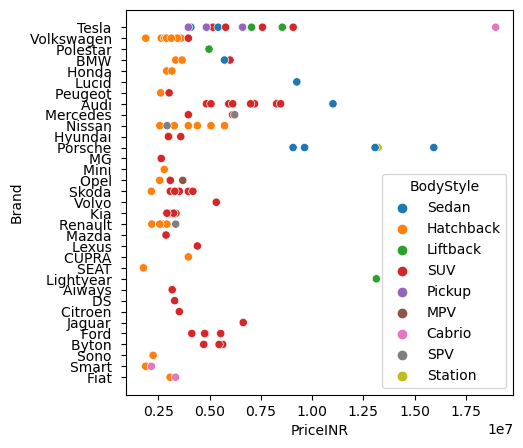

In [364]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df1["PriceINR"],y=df1["Brand"],hue=df1["BodyStyle"])

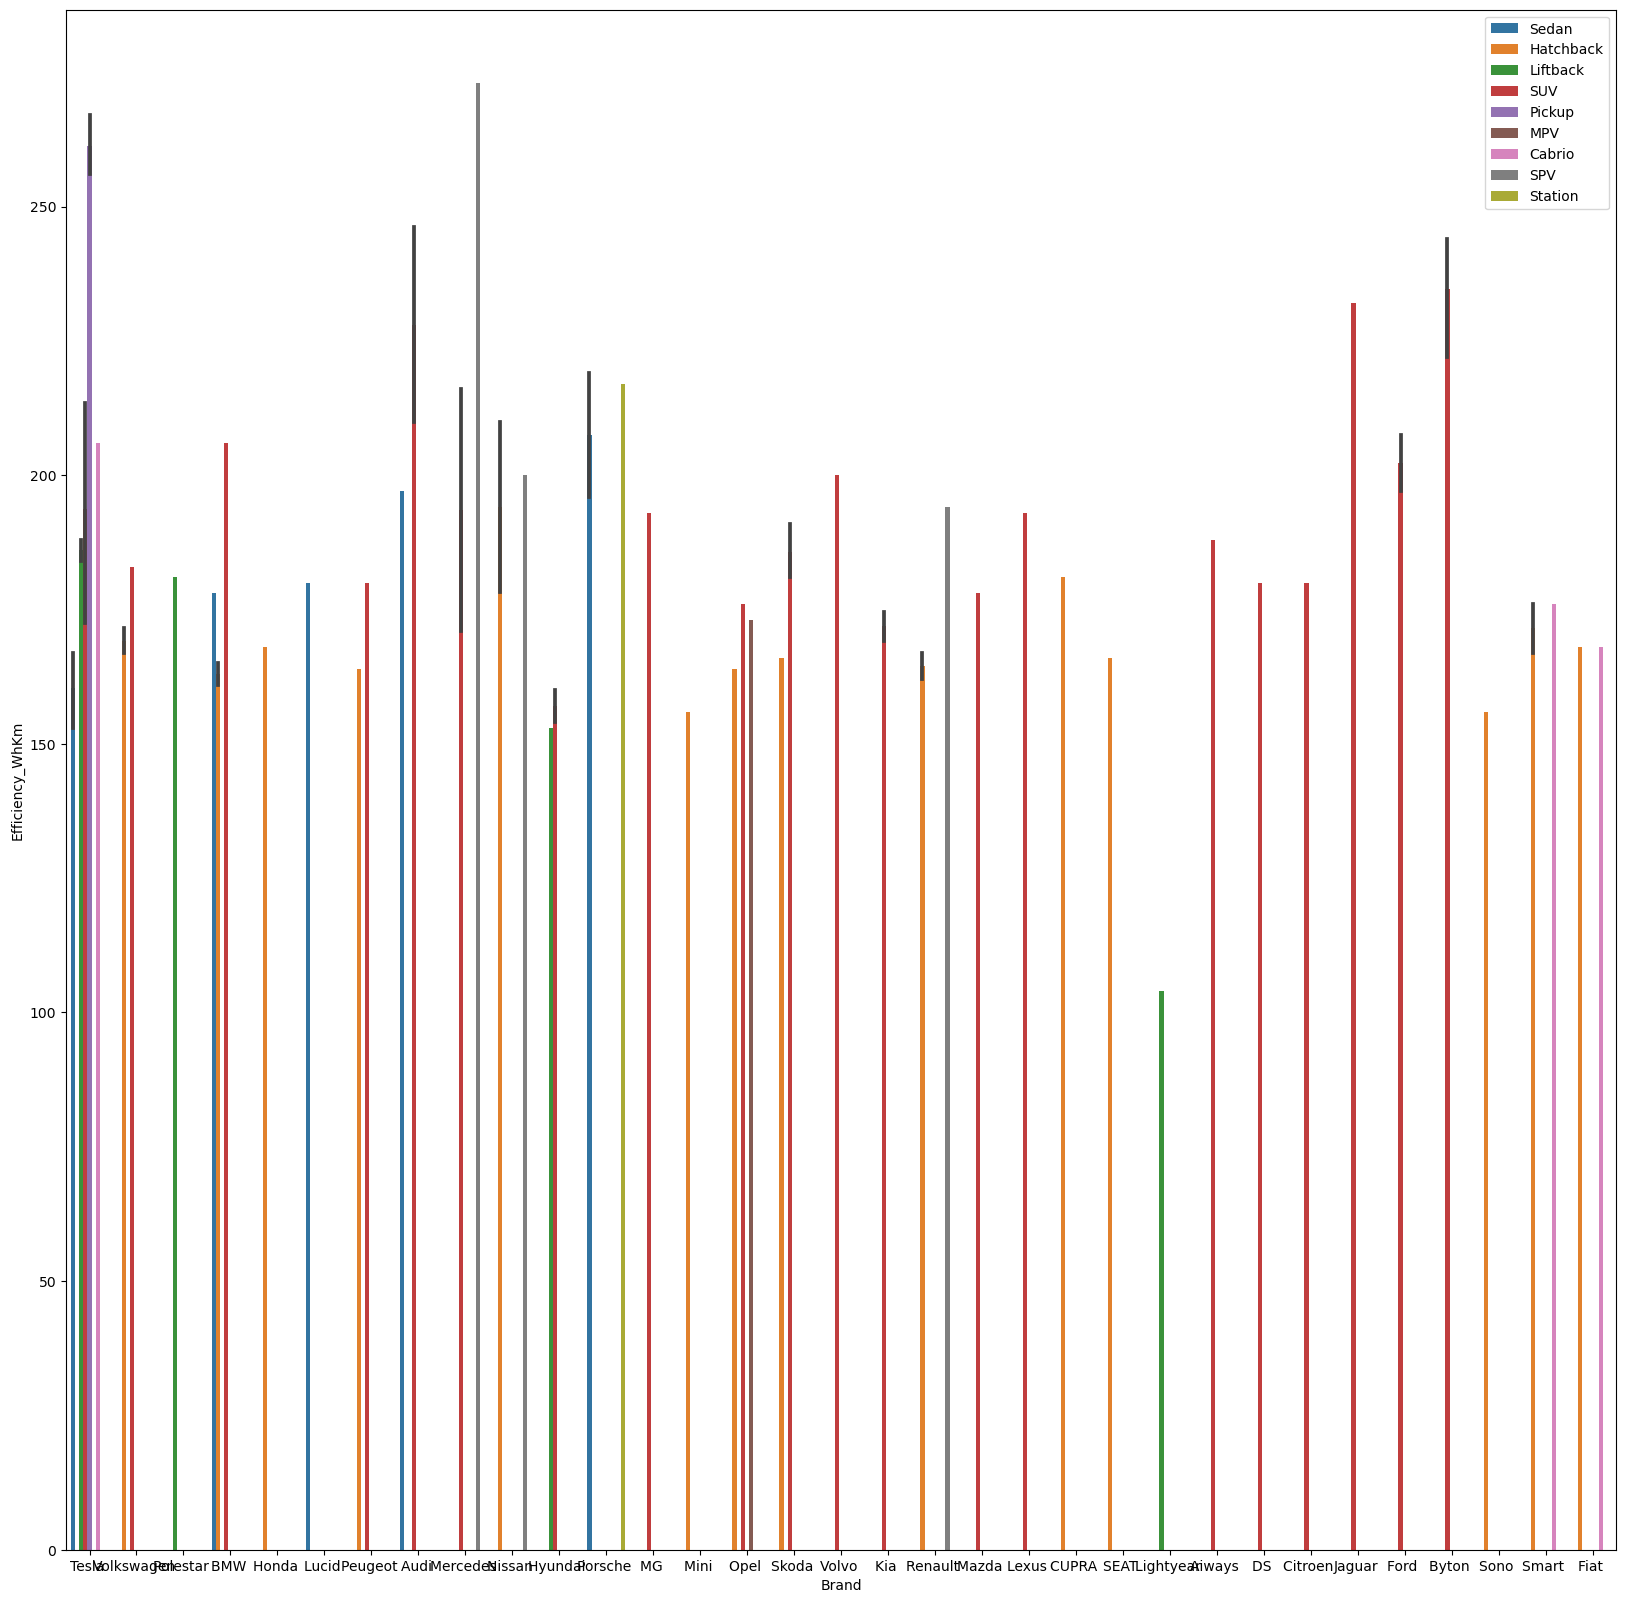

In [365]:
plt.figure(figsize=(20,20))
sns.barplot(x=df1["Brand"],y=df1["Efficiency_WhKm"],hue=df1["BodyStyle"])
plt.legend(loc='upper right')

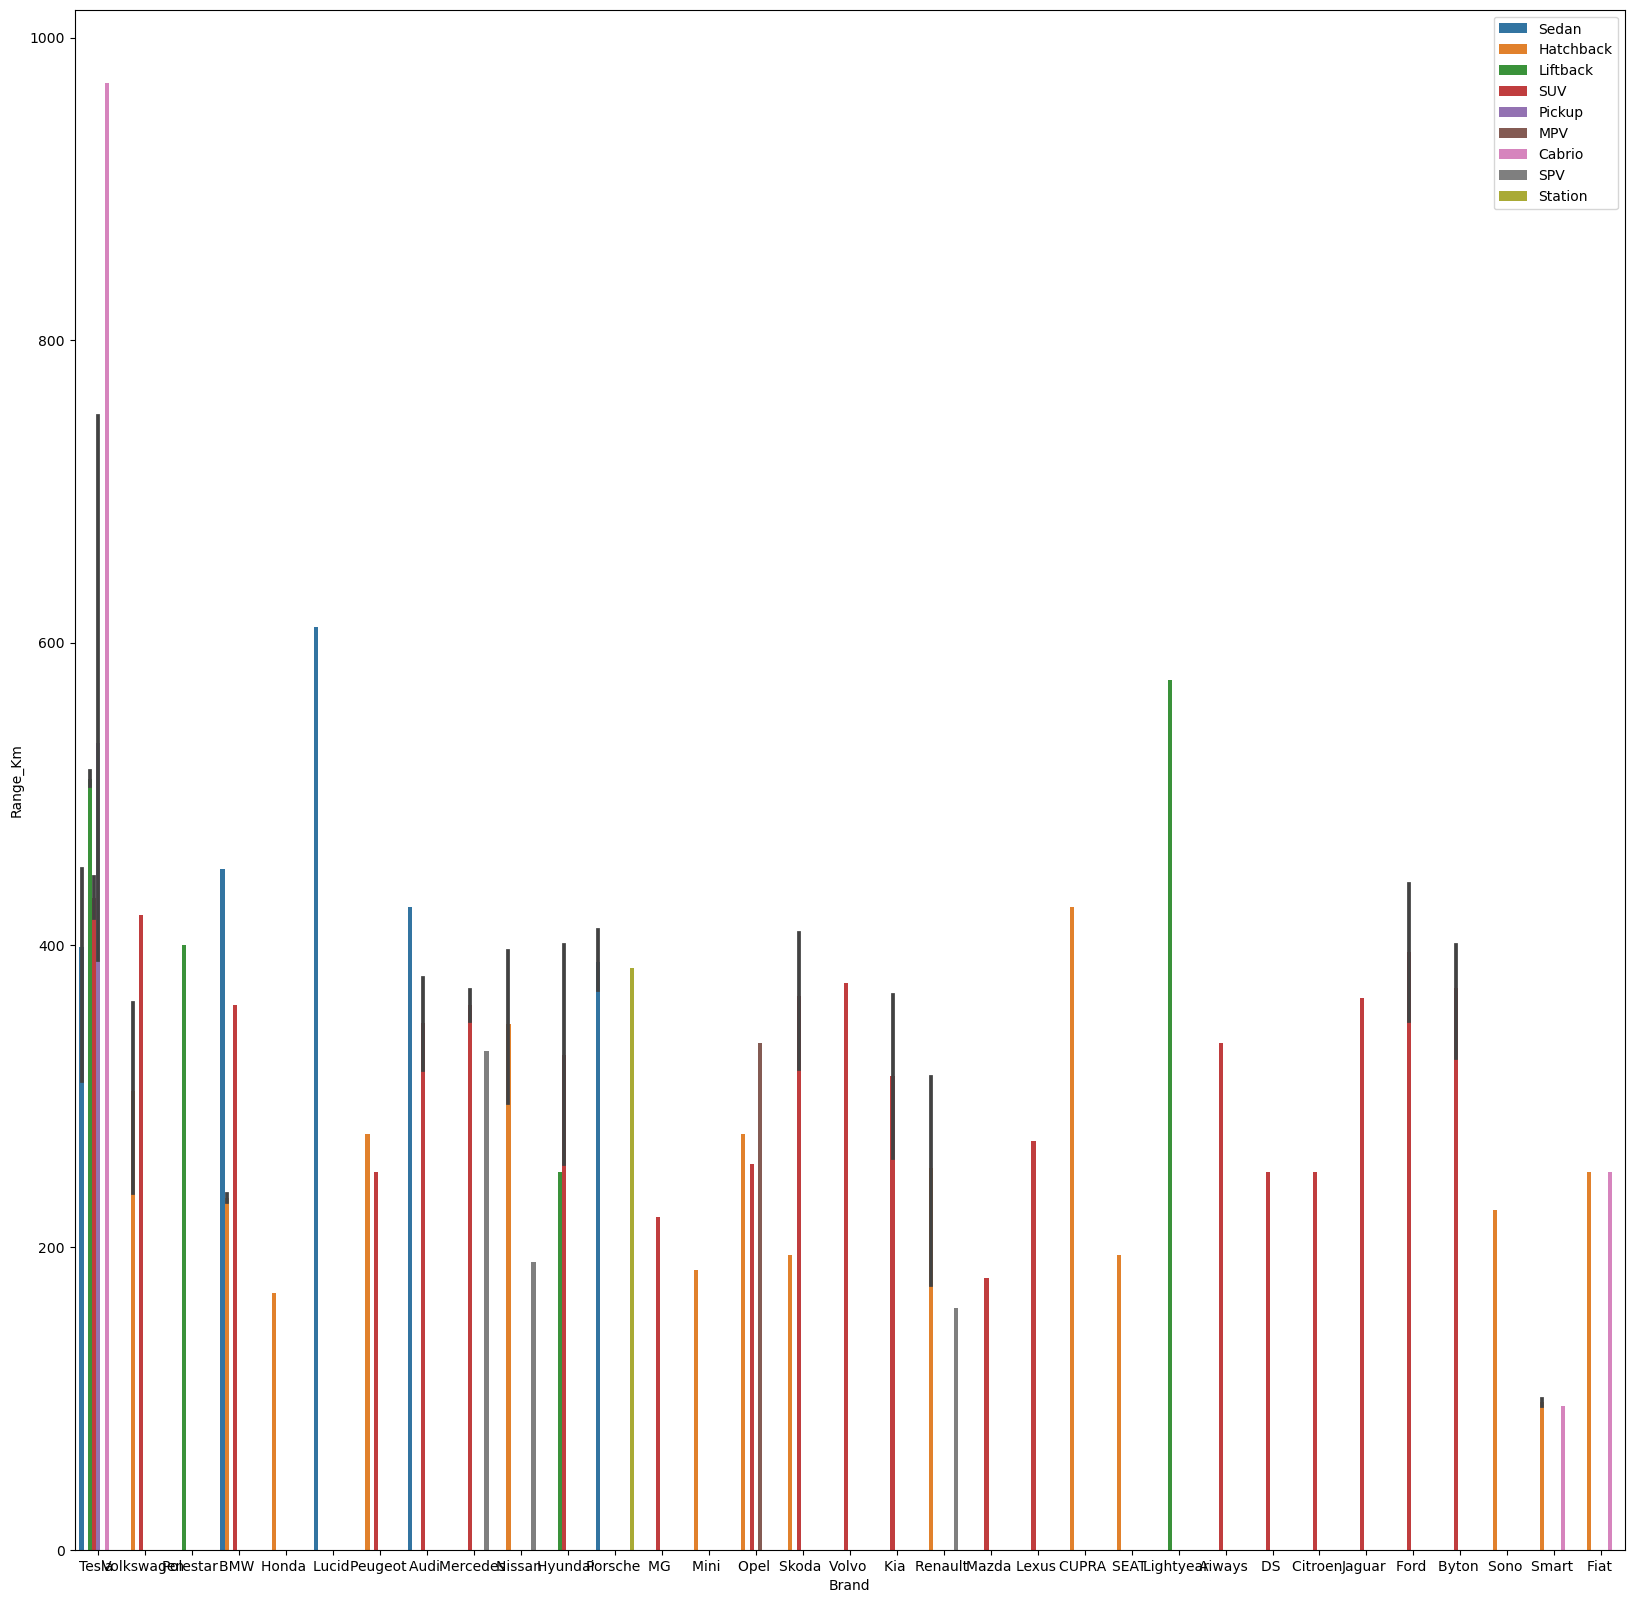

In [366]:
plt.figure(figsize=(20,20))
sns.barplot(x=df1["Brand"],y=df1["Range_Km"],hue=df1["BodyStyle"])
plt.legend(loc='upper right')

<Axes: xlabel='PriceINR', ylabel='Brand'>

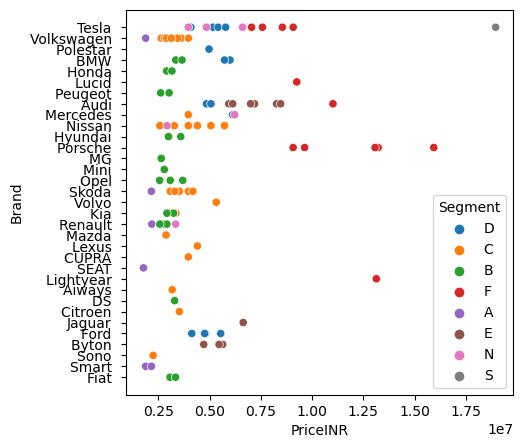

In [367]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df1["PriceINR"],y=df1["Brand"],hue=df1["Segment"])

<Axes: xlabel='BodyStyle', ylabel='Brand'>

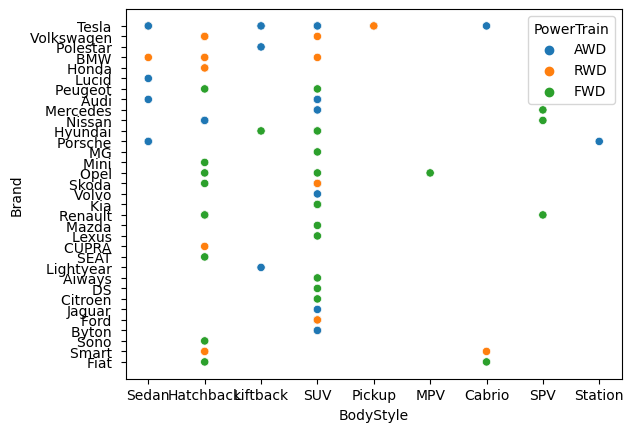

In [368]:
sns.scatterplot(y = df1["Brand"],x = df1["BodyStyle"],hue=df1["PowerTrain"])

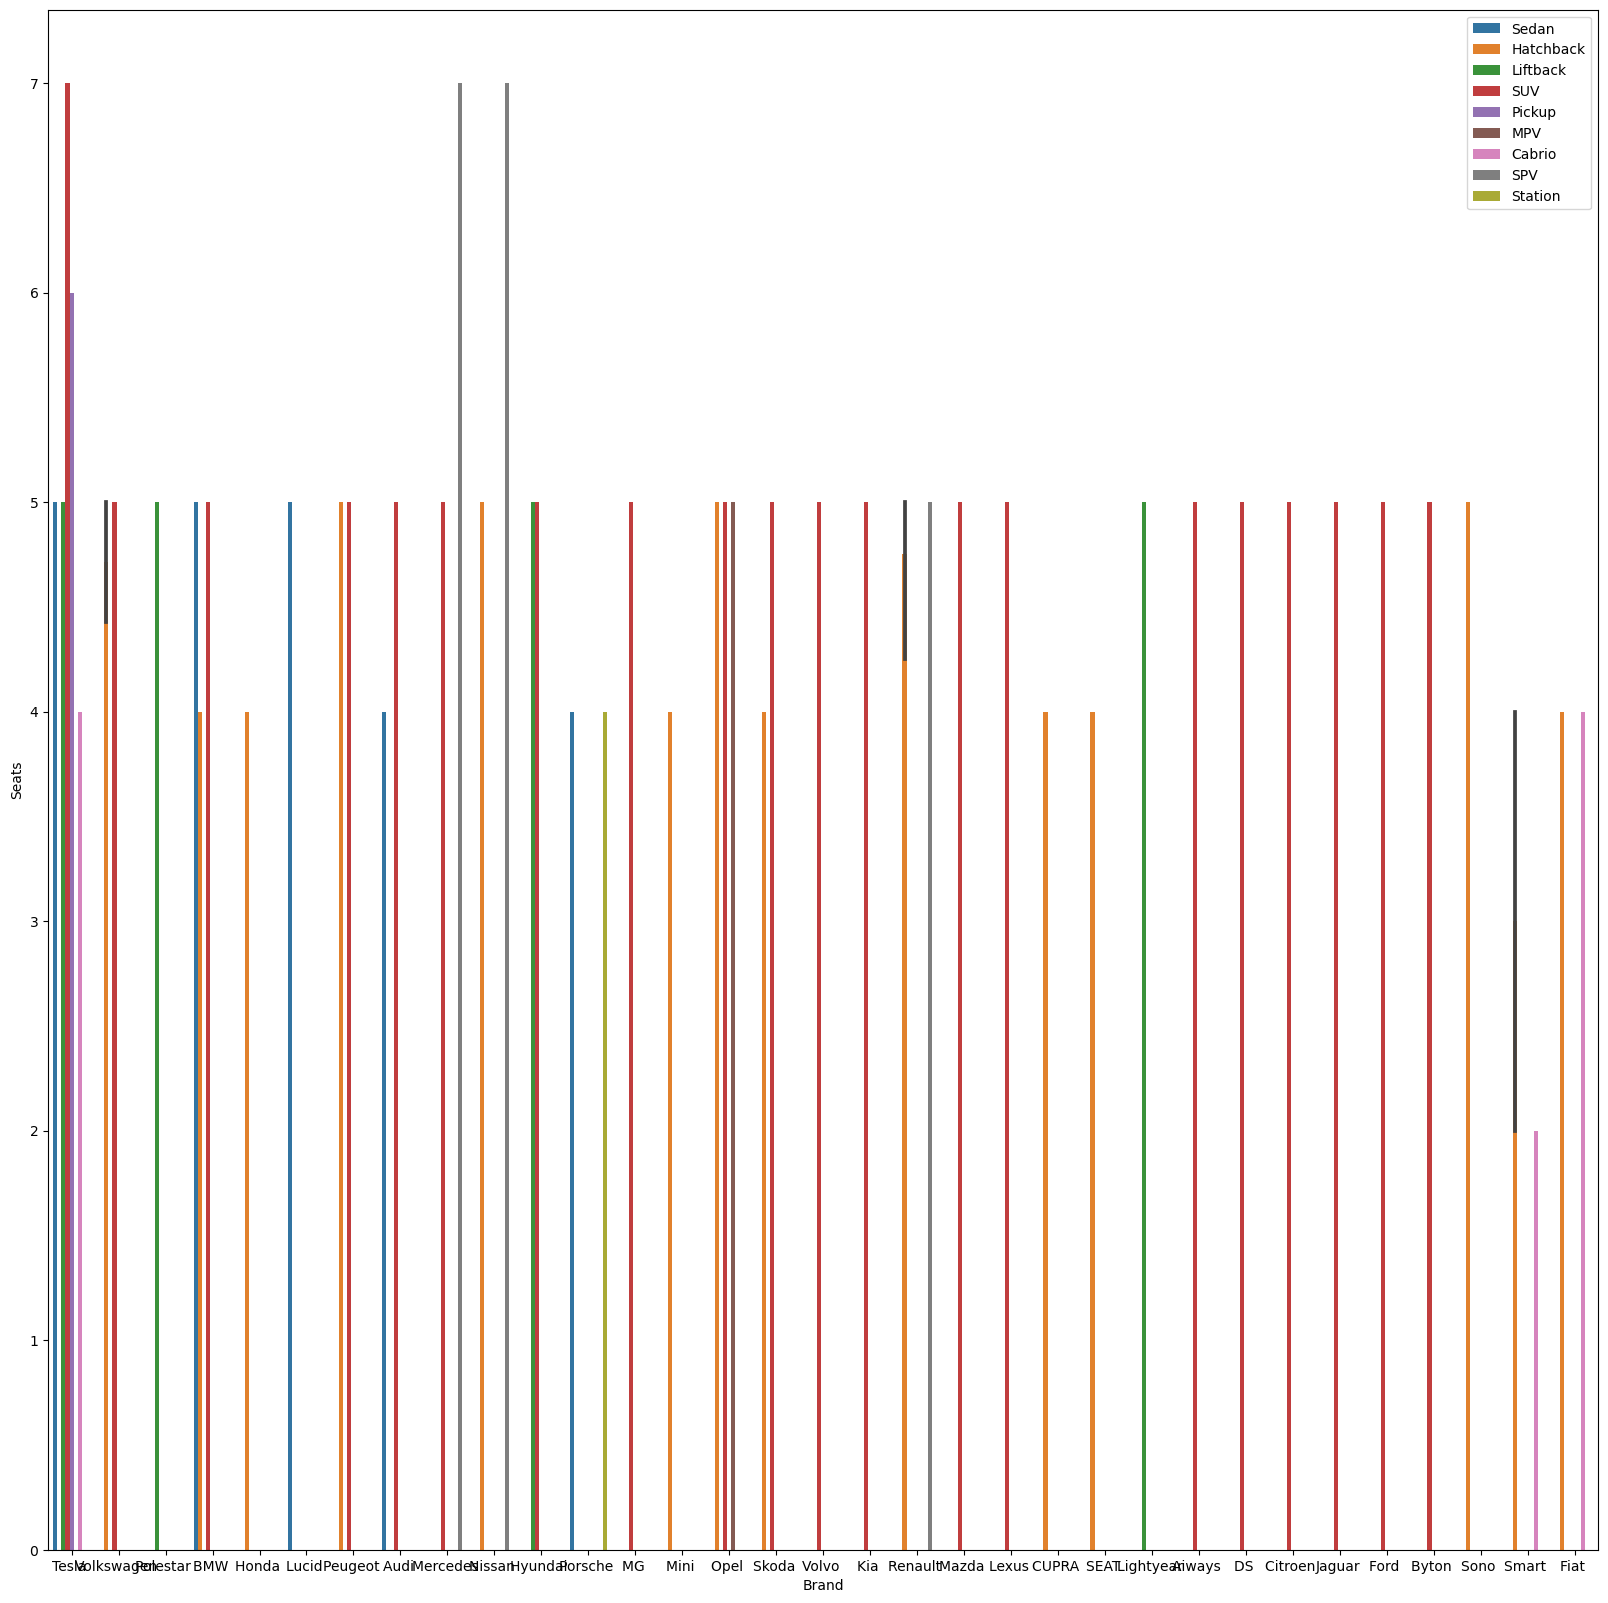

In [369]:
plt.figure(figsize=(20,20))
sns.barplot(x=df1["Brand"],y=df1["Seats"],hue=df1["BodyStyle"])
plt.legend(loc='upper right')

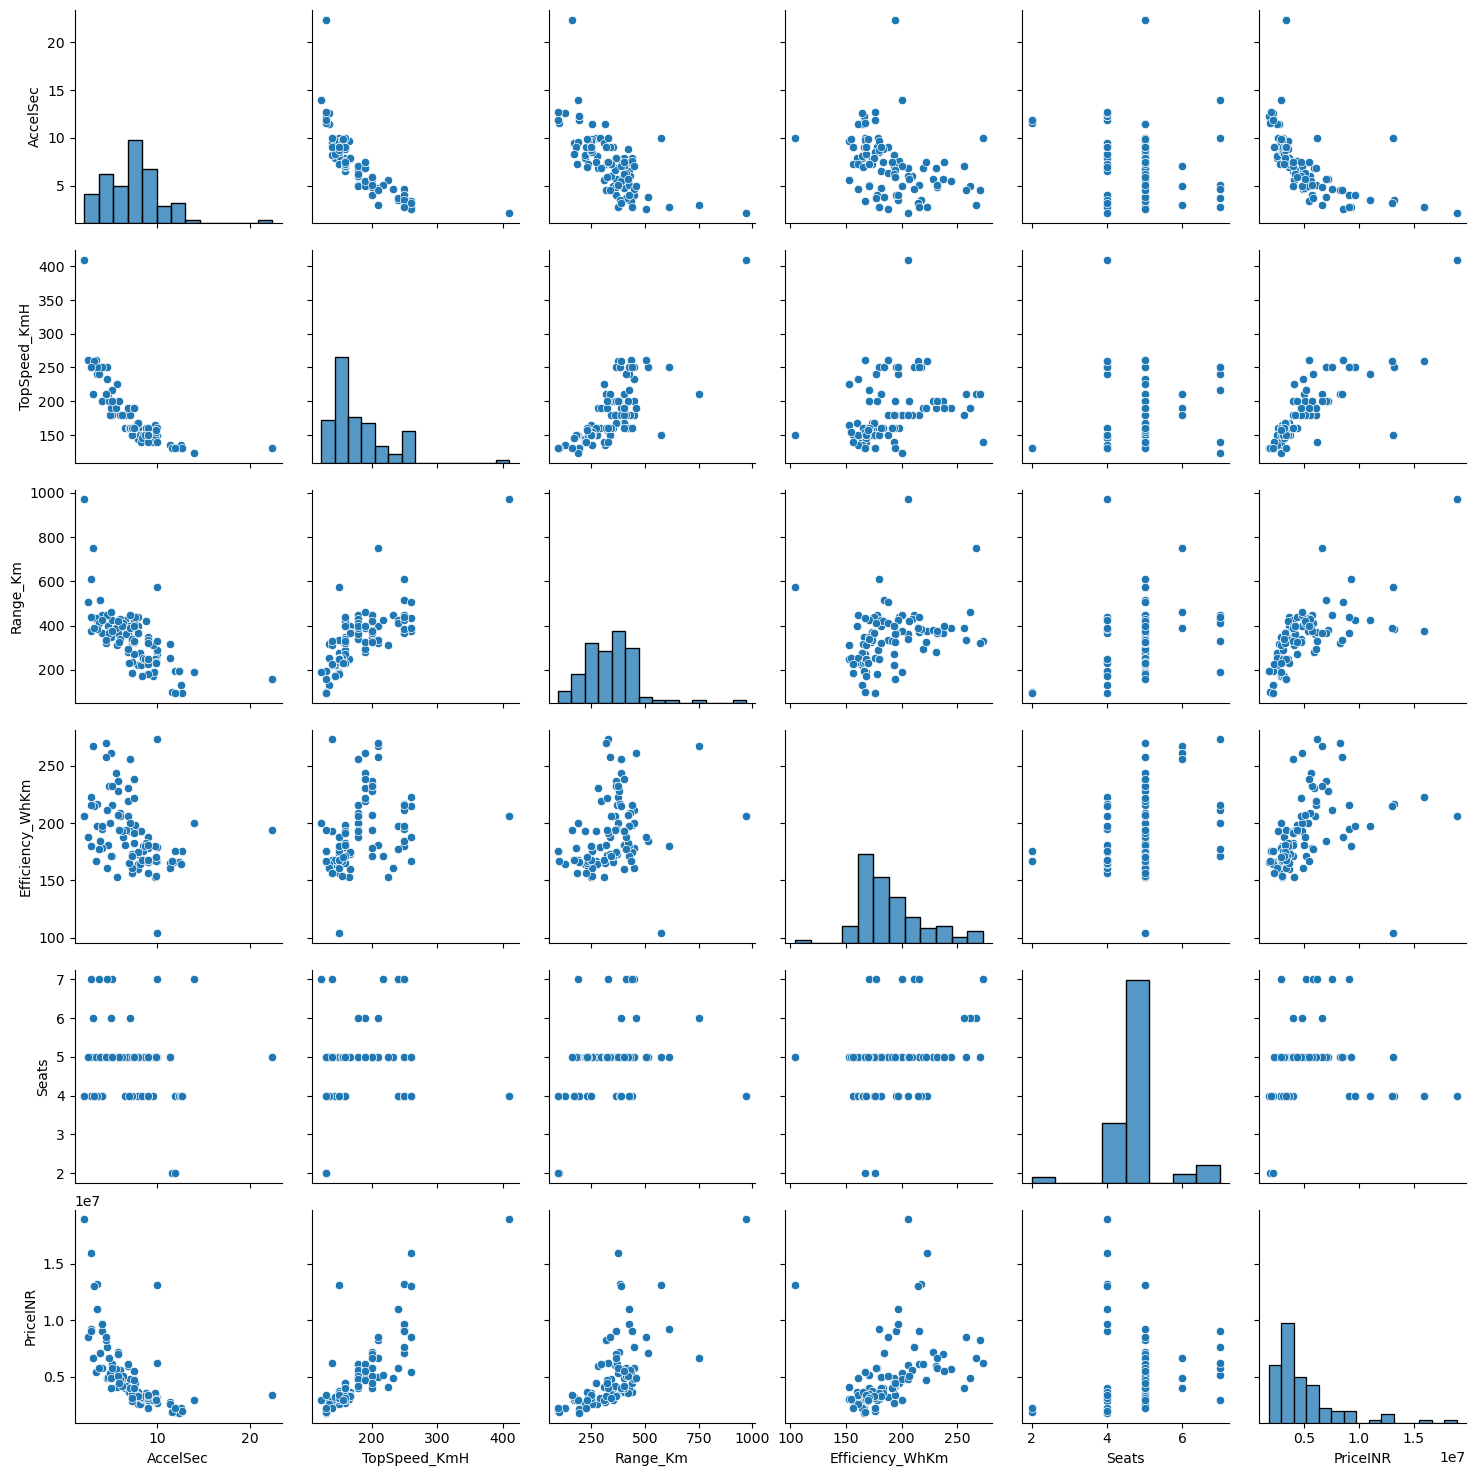

In [370]:
sns.pairplot(df1)

In [407]:
categorical_columns = ["RapidCharge","Segment","PowerTrain", "PlugType", "BodyStyle"]
df.drop(["RapidCharge_No","Segment_A","PowerTrain_AWD","PlugType_Type 1 CHAdeMO","BodyStyle_Cabrio"],axis=1,inplace=True)
df = pd.get_dummies(df1, columns=categorical_columns)

In [408]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceINR,RapidCharge_No,RapidCharge_Yes,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S,PowerTrain_AWD,PowerTrain_FWD,PowerTrain_RWD,PlugType_Type 1 CHAdeMO,PlugType_Type 2,PlugType_Type 2 CCS,PlugType_Type 2 CHAdeMO,BodyStyle_Cabrio,BodyStyle_Hatchback,BodyStyle_Liftback,BodyStyle_MPV,BodyStyle_Pickup,BodyStyle_SPV,BodyStyle_SUV,BodyStyle_Sedan,BodyStyle_Station
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,5,4888897.60,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,5,2643600.00,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,Polestar,2,4.7,210,400,181,620,5,4973492.80,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,BMW,iX3,6.8,180,360,206,560,5,5995684.80,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,Honda,e,9.5,145,170,168,190,4,2907695.64,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0


In [410]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceINR,RapidCharge_Yes,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S,PowerTrain_FWD,PowerTrain_RWD,PlugType_Type 2,PlugType_Type 2 CCS,PlugType_Type 2 CHAdeMO,BodyStyle_Hatchback,BodyStyle_Liftback,BodyStyle_MPV,BodyStyle_Pickup,BodyStyle_SPV,BodyStyle_SUV,BodyStyle_Sedan,BodyStyle_Station
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,5,4888897.60,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,5,2643600.00,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
2,Polestar,2,4.7,210,400,181,620,5,4973492.80,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,BMW,iX3,6.8,180,360,206,560,5,5995684.80,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
4,Honda,e,9.5,145,170,168,190,4,2907695.64,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0


In [425]:
df.shape

(103, 30)

In [411]:
df.corr()

C:\Users\samar\AppData\Local\Temp\ipykernel_14256\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceINR,RapidCharge_Yes,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S,PowerTrain_FWD,PowerTrain_RWD,PlugType_Type 2,PlugType_Type 2 CCS,PlugType_Type 2 CHAdeMO,BodyStyle_Hatchback,BodyStyle_Liftback,BodyStyle_MPV,BodyStyle_Pickup,BodyStyle_SPV,BodyStyle_SUV,BodyStyle_Sedan,BodyStyle_Station
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.175335,-0.627174,-0.514820,0.219202,0.089784,-0.272622,-0.160106,-0.415748,0.234998,-0.174638,0.533365,0.178714,0.209931,-0.247790,0.009838,0.329247,-0.094489,-0.003169,-0.138213,0.465527,-0.121412,-0.393803,-0.128473
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.126470,0.829057,0.251054,-0.343784,-0.220692,0.215241,0.134655,0.537846,-0.097666,0.527045,-0.525578,-0.219271,0.042224,0.053618,-0.101969,-0.420071,0.145889,-0.066665,0.056479,-0.192511,-0.000333,0.481769,0.161685
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.300163,0.674844,0.401290,-0.303817,-0.048325,0.201535,0.017555,0.336531,0.081739,0.498396,-0.421194,-0.177815,-0.153280,0.211971,-0.092706,-0.375782,0.198520,-0.002990,0.268710,-0.154861,0.040523,0.221518,0.036489
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.301230,0.396705,0.105673,-0.362006,-0.179351,-0.035057,0.543141,0.058644,0.445197,0.056653,-0.346020,-0.167882,-0.030948,0.053800,-0.075537,-0.375969,-0.208543,-0.054399,0.424835,0.195253,0.251850,-0.028587,0.093671
Seats,-0.175335,0.126470,0.300163,0.301230,1.000000,0.020920,0.423111,-0.132715,0.040342,0.199753,0.048239,-0.023001,0.402968,-0.110459,0.059042,-0.288441,-0.128129,0.017920,0.025480,-0.325088,0.033229,0.014566,0.244184,0.317085,0.327305,-0.158787,-0.110459
PriceINR,-0.627174,0.829057,0.674844,0.396705,0.020920,1.000000,0.197208,-0.322378,-0.275769,0.032529,0.178181,0.682892,-0.021956,0.464017,-0.450019,-0.262507,-0.005640,0.068079,-0.086621,-0.413426,0.183291,-0.040533,0.012858,-0.043439,-0.047428,0.426250,0.274549
RapidCharge_Yes,-0.514820,0.251054,0.401290,0.105673,0.423111,0.197208,1.000000,0.117717,0.144801,0.093256,0.074068,0.082024,-0.136698,0.022365,0.074962,-0.293607,-0.729986,0.594322,0.039123,-0.141216,0.051020,0.022365,0.039123,-0.229522,0.198959,0.074068,0.022365
Segment_B,0.219202,-0.343784,-0.303817,-0.362006,-0.132715,-0.322378,0.117717,1.000000,-0.334094,-0.215166,-0.170894,-0.189251,-0.129616,-0.051602,0.498548,-0.074030,-0.161260,0.198070,-0.090267,0.213206,-0.117717,0.189990,-0.090267,-0.090267,-0.029212,-0.170894,-0.051602
Segment_C,0.089784,-0.220692,-0.048325,-0.179351,0.040342,-0.275769,0.144801,-0.334094,1.000000,-0.264669,-0.210212,-0.232793,-0.159437,-0.063474,0.099024,0.135494,-0.198361,0.050602,0.270185,0.262259,-0.045371,-0.063474,-0.111035,-0.111035,0.038481,-0.210212,-0.063474
Segment_D,-0.272622,0.215241,0.201535,-0.035057,0.199753,0.032529,0.093256,-0.215166,-0.264669,1.000000,-0.135383,-0.149925,-0.102682,-0.040879,-0.309124,0.087262,-0.127750,0.156911,-0.071510,-0.277172,0.034816,-0.040879,-0.071510,-0.071510,0.191259,0.236468,-0.040879


C:\Users\samar\AppData\Local\Temp\ipykernel_14256\1246646041.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')


<Axes: >

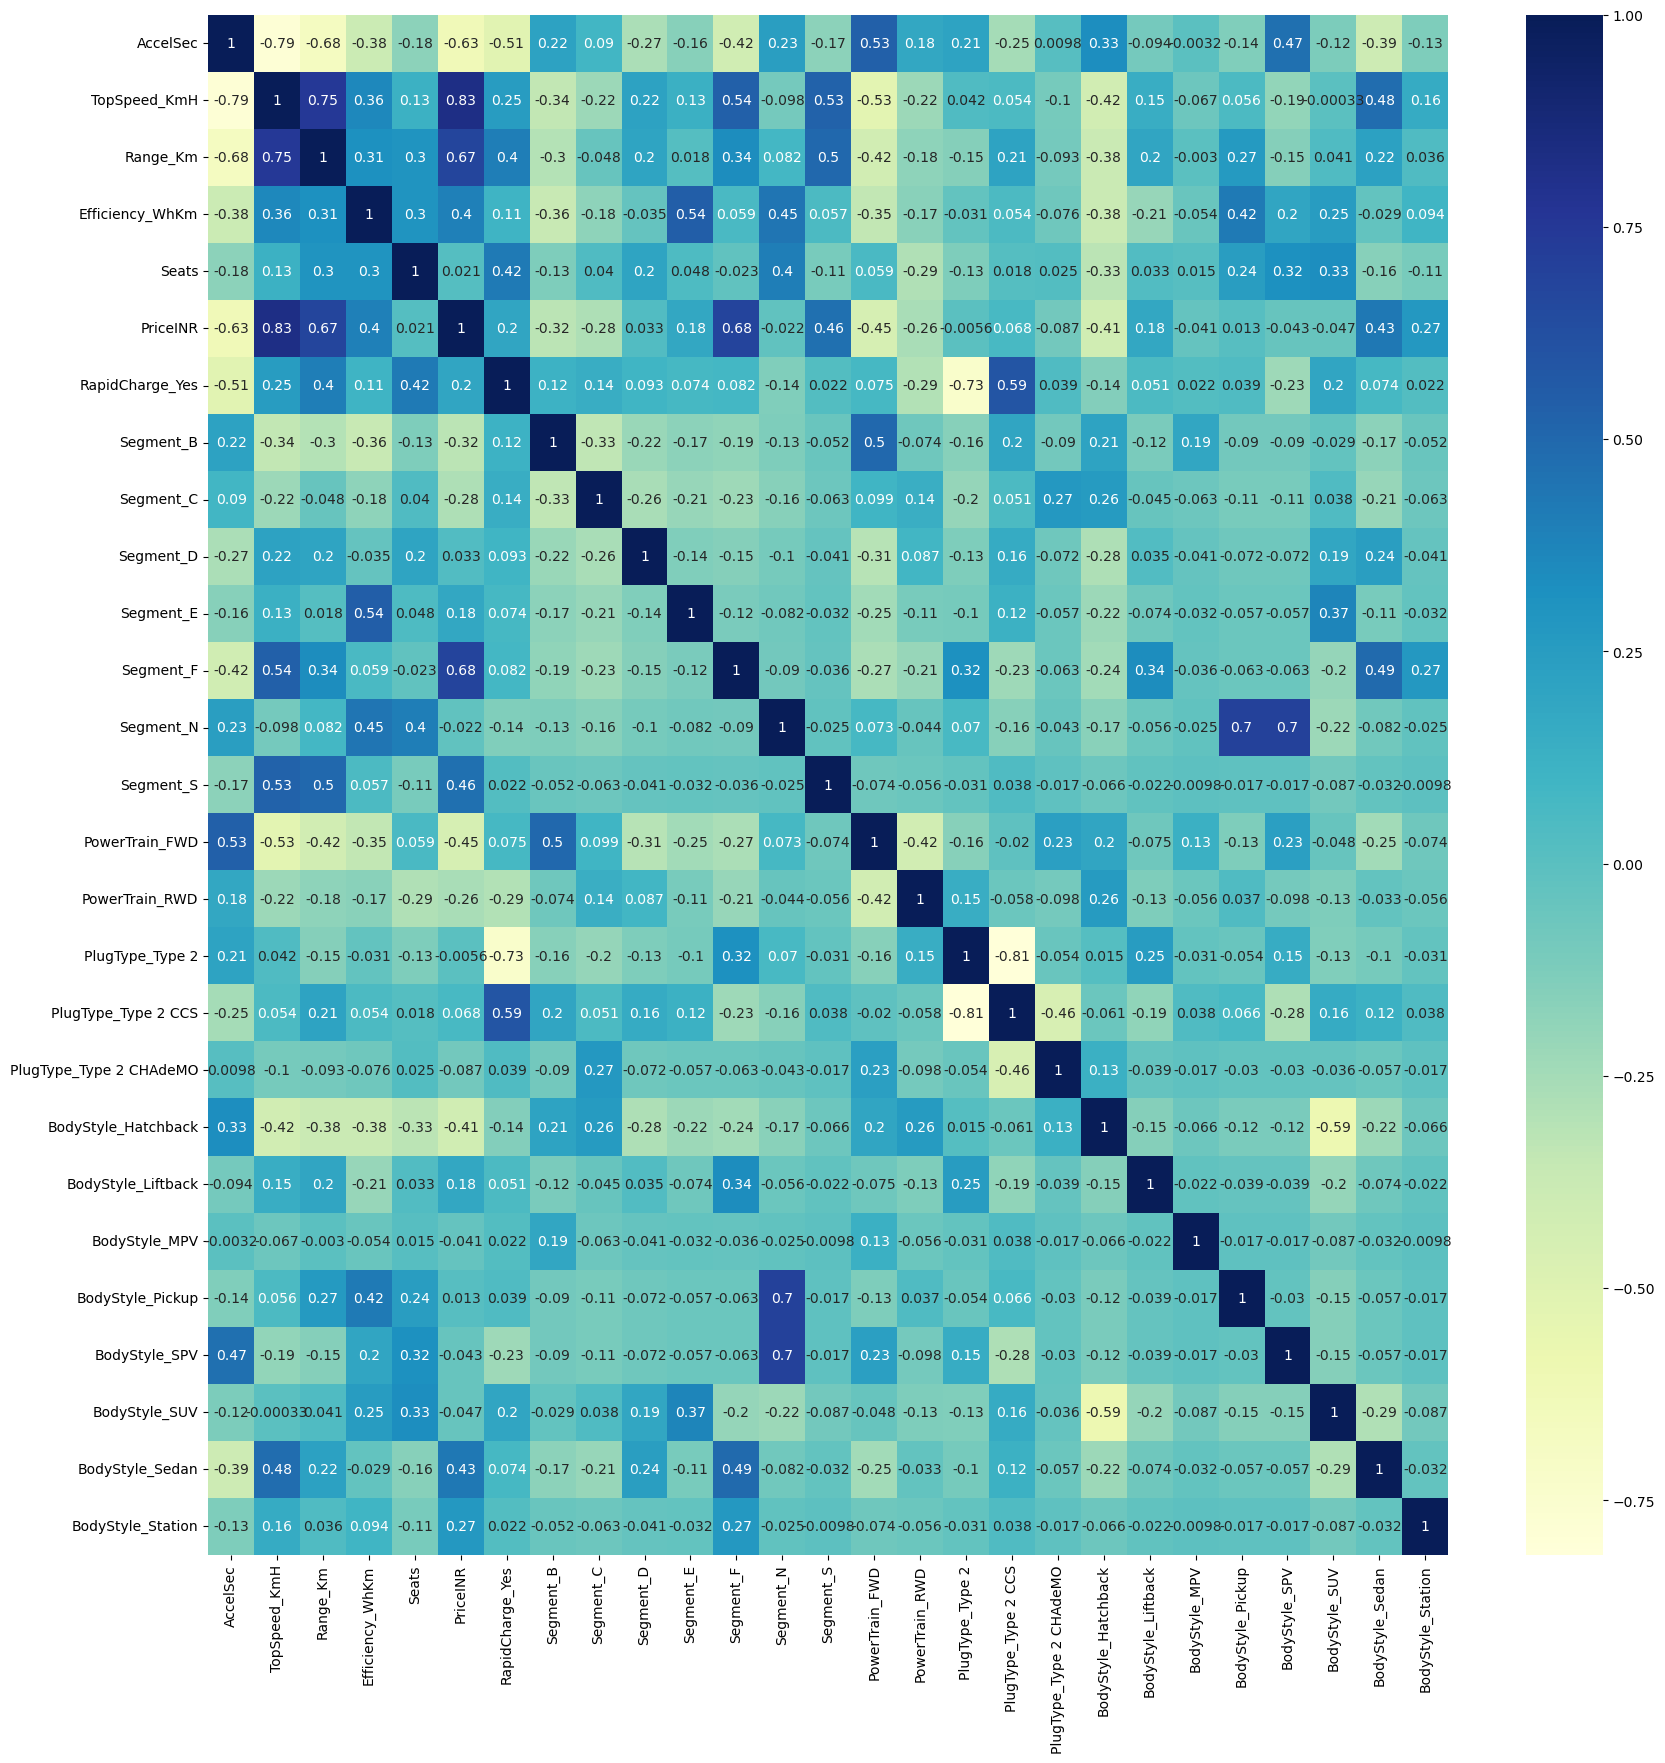

In [414]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

In [429]:
# Geographical Segmentation 
df2 = pd.read_csv("geographical_dataset.csv")

In [447]:
df2.head()
df2 = df2[df2["State/ UT"]!="Total"]

In [448]:
df2.shape

(13, 3)

In [449]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sl. No.            13 non-null     object
 1   State/ UT          13 non-null     object
 2   Charging Stations  13 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 416.0+ bytes


In [450]:
df2.describe()

,Charging Stations
count,13.000000
mean,34.769231
std,23.878700
min,9.000000
25%,16.000000
50%,29.000000
75%,48.000000
max,94.000000


In [451]:
df2.isna().sum()

Sl. No.              0
State/ UT            0
Charging Stations    0
dtype: int64

In [452]:
df2.duplicated().sum()

0

In [453]:
df2["State/ UT"].value_counts()

Telangana                     1
Jharkhand                     1
Goa                           1
Karnataka                     1
Himachal Pradesh              1
Uttar Pradesh                 1
Rajasthan                     1
Delhi                         1
Chandigarh UT                 1
Delhi-Jaipur- Agra Highway    1
Mumbai-Pune Expressway        1
Jaipur- Delhi Highway         1
Delhi- Chandigarh Highway     1
Name: State/ UT, dtype: int64

In [463]:
for i in range(len(df2)):
    if(df2["Charging Stations"][i] == df2["Charging Stations"].max()):
        print(f"{df2['State/ UT'][i]} with {df2['Charging Stations'][i]} charging Stations")

Delhi with 94 charging Stations


<Axes: xlabel='Charging Stations', ylabel='State/ UT'>

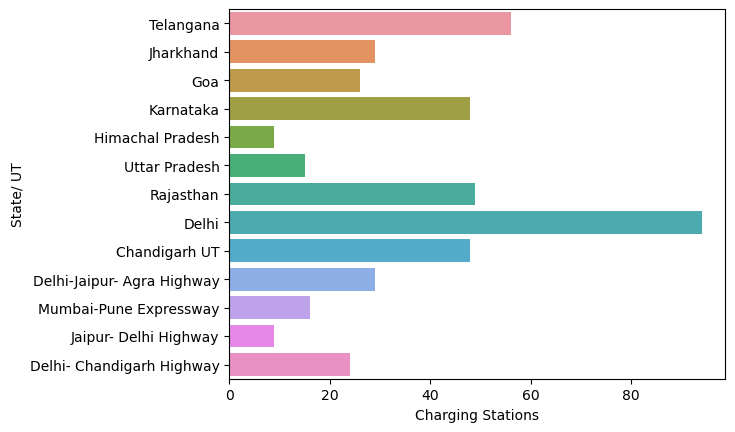

In [465]:
sns.barplot(x=df2["Charging Stations"],y = df2["State/ UT"])

([<matplotlib.patches.Wedge at 0x27020ef5cd0>,
 [Text(-0.4174174932055103, 1.0177242437743281, 'Telangana'),
  Text(-0.9135532869850425, 0.612715588049484, 'Jharkhand'),
  Text(-1.0761738392433156, 0.22770566029043426, 'Goa'),
  Text(-1.0489608476019545, -0.33118143093807256, 'Karnataka'),
  Text(-0.8399123911176315, -0.7103148423389892, 'Himachal Pradesh'),
  Text(-0.7103148619985578, -0.839912374491512, 'Uttar Pradesh'),
  Text(-0.2797746215805737, -1.0638261893370773, 'Rajasthan'),
  Text(0.739068821504109, -0.8147252770600208, 'Delhi'),
  Text(1.0871653391771288, 0.1675455916814245, 'Chandigarh UT'),
  Text(0.8497049269596735, 0.698571068038504, 'Delhi-Jaipur- Agra Highway'),
  Text(0.5935350573338054, 0.9261296538367382, 'Mumbai-Pune Expressway'),
  Text(0.42448102162541634, 1.0147984343108944, 'Jaipur- Delhi Highway'),
  Text(0.18264152494076358, 1.0847313369527556, 'Delhi- Chandigarh Highway')],
 [Text(-0.2276822690211874, 0.555122314785997, '12.4%'),
  Text(-0.4983017929009322,

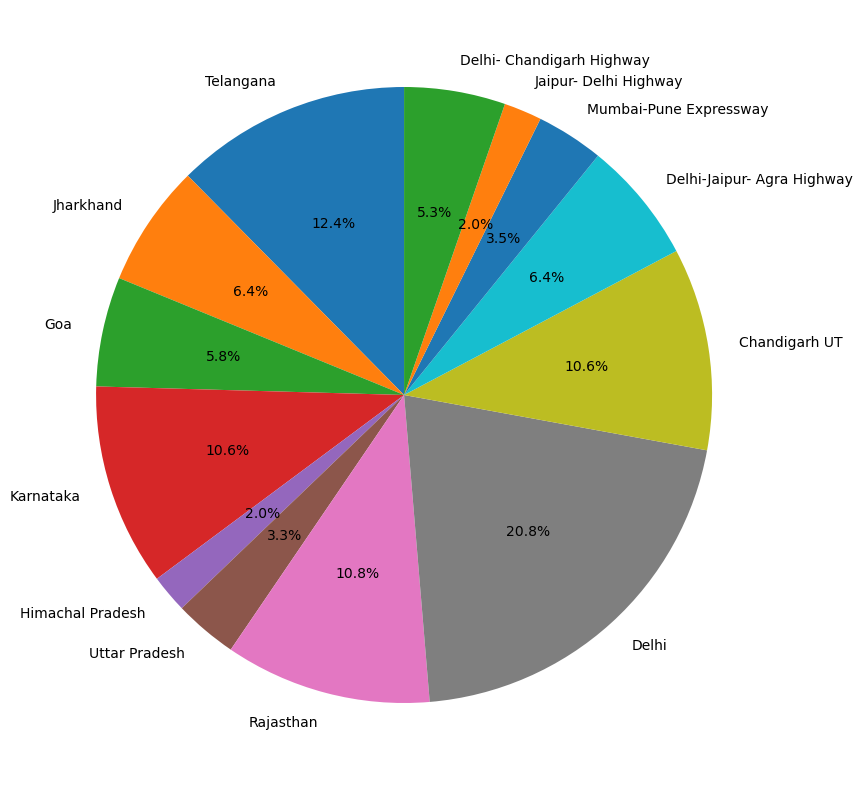

In [476]:
plt.figure(figsize=(10,10))
plt.pie(df2["Charging Stations"], labels=df2["State/ UT"], autopct='%1.1f%%', startangle=90)

In [483]:
# Demographic Segmentation
df3 = pd.read_csv("Demographic_dataset.csv")

In [484]:
df3.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [486]:
df3.shape

(99, 8)

In [487]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   Price             99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB


In [488]:
df3.describe()

,Age,No of Dependents,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,2.270707e+06,1.194040e+06
std,6.246054,1.335265,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.700000e+06,1.500000e+06
max,51.000000,4.000000,5.200000e+06,3.000000e+06


<Axes: xlabel='Age', ylabel='Price'>

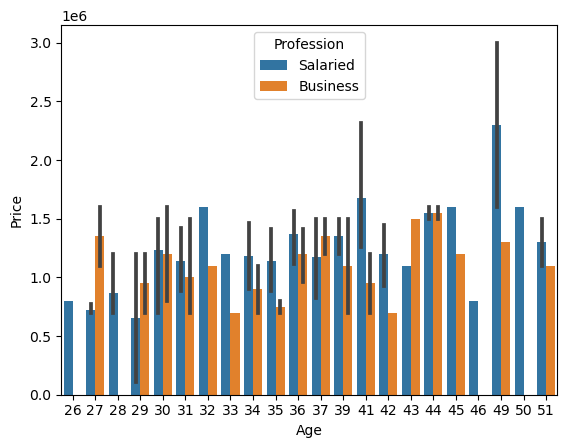

In [498]:
sns.barplot(x=df3["Age"],y=df3["Price"],hue=df3["Profession"])

<Axes: xlabel='Age', ylabel='Price'>

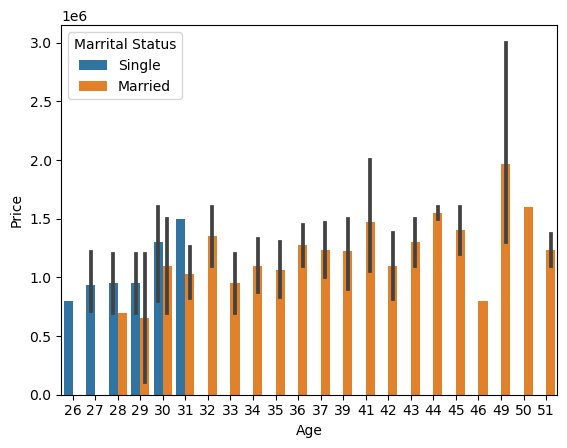

In [499]:
sns.barplot(x=df3["Age"],y=df3["Price"],hue=df3["Marrital Status"])

<Axes: xlabel='Age', ylabel='Price'>

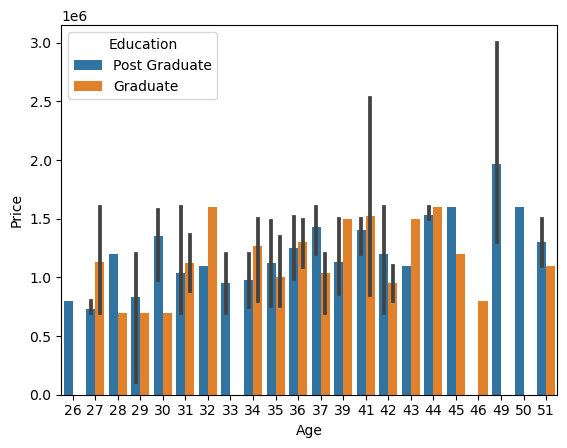

In [500]:
sns.barplot(x=df3["Age"],y=df3["Price"],hue=df3["Education"])

<Axes: xlabel='Age', ylabel='Price'>

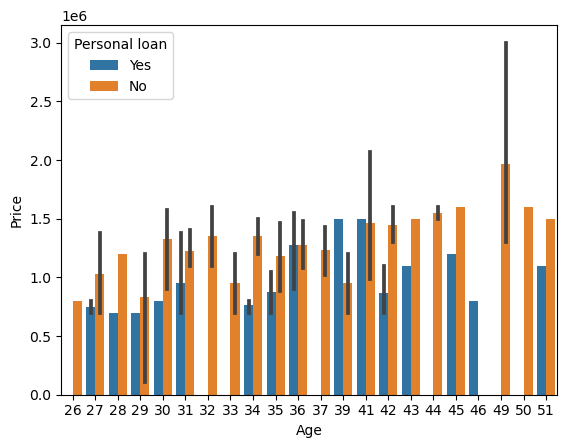

In [503]:
sns.barplot(x=df3["Age"],y=df3["Price"],hue=df3["Personal loan"])

In [508]:
df3.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [516]:
categorical_columns = ["Profession","Marrital Status","Education","Personal loan"]
df3_conv = pd.get_dummies(df3, columns=categorical_columns)
df3_conv.drop(["Profession_Business","Marrital Status_Married","Education_Graduate","Personal loan_No"],axis=1,inplace=True)

In [517]:
df3_conv

,Age,No of Dependents,Total Salary,Price,Profession_Salaried,Marrital Status_Single,Education_Post Graduate,Personal loan_Yes
0,27,0,800000,800000,1,1,1,1
1,35,2,2000000,1000000,1,0,1,1
2,45,4,1800000,1200000,0,0,0,1
3,41,3,2200000,1200000,0,0,1,0
4,31,2,2600000,1600000,1,0,1,1
...,...,...,...,...,...,...,...,...
94,27,0,2400000,1600000,0,1,0,0
95,50,3,5100000,1600000,1,0,1,0
96,51,2,2200000,1100000,0,0,0,1
97,51,2,4000000,1500000,1,0,1,0


In [518]:
df3_conv.corr()

,Age,No of Dependents,Total Salary,Price,Profession_Salaried,Marrital Status_Single,Education_Post Graduate,Personal loan_Yes
Age,1.000000,0.543675,0.587082,0.376661,-0.003537,-0.551688,0.073667,-0.007021
No of Dependents,0.543675,1.000000,0.234379,0.088822,-0.057834,-0.609181,0.012550,0.149263
Total Salary,0.587082,0.234379,1.000000,0.717442,0.199570,-0.416615,0.098250,-0.139700
Price,0.376661,0.088822,0.717442,1.000000,0.125732,-0.149477,0.058201,-0.332734
Profession_Salaried,-0.003537,-0.057834,0.199570,0.125732,1.000000,-0.041071,0.161896,0.059321
Marrital Status_Single,-0.551688,-0.609181,-0.416615,-0.149477,-0.041071,1.000000,0.029279,0.009126
Education_Post Graduate,0.073667,0.012550,0.098250,0.058201,0.161896,0.029279,1.000000,-0.047972
Personal loan_Yes,-0.007021,0.149263,-0.139700,-0.332734,0.059321,0.009126,-0.047972,1.000000


<Axes: >

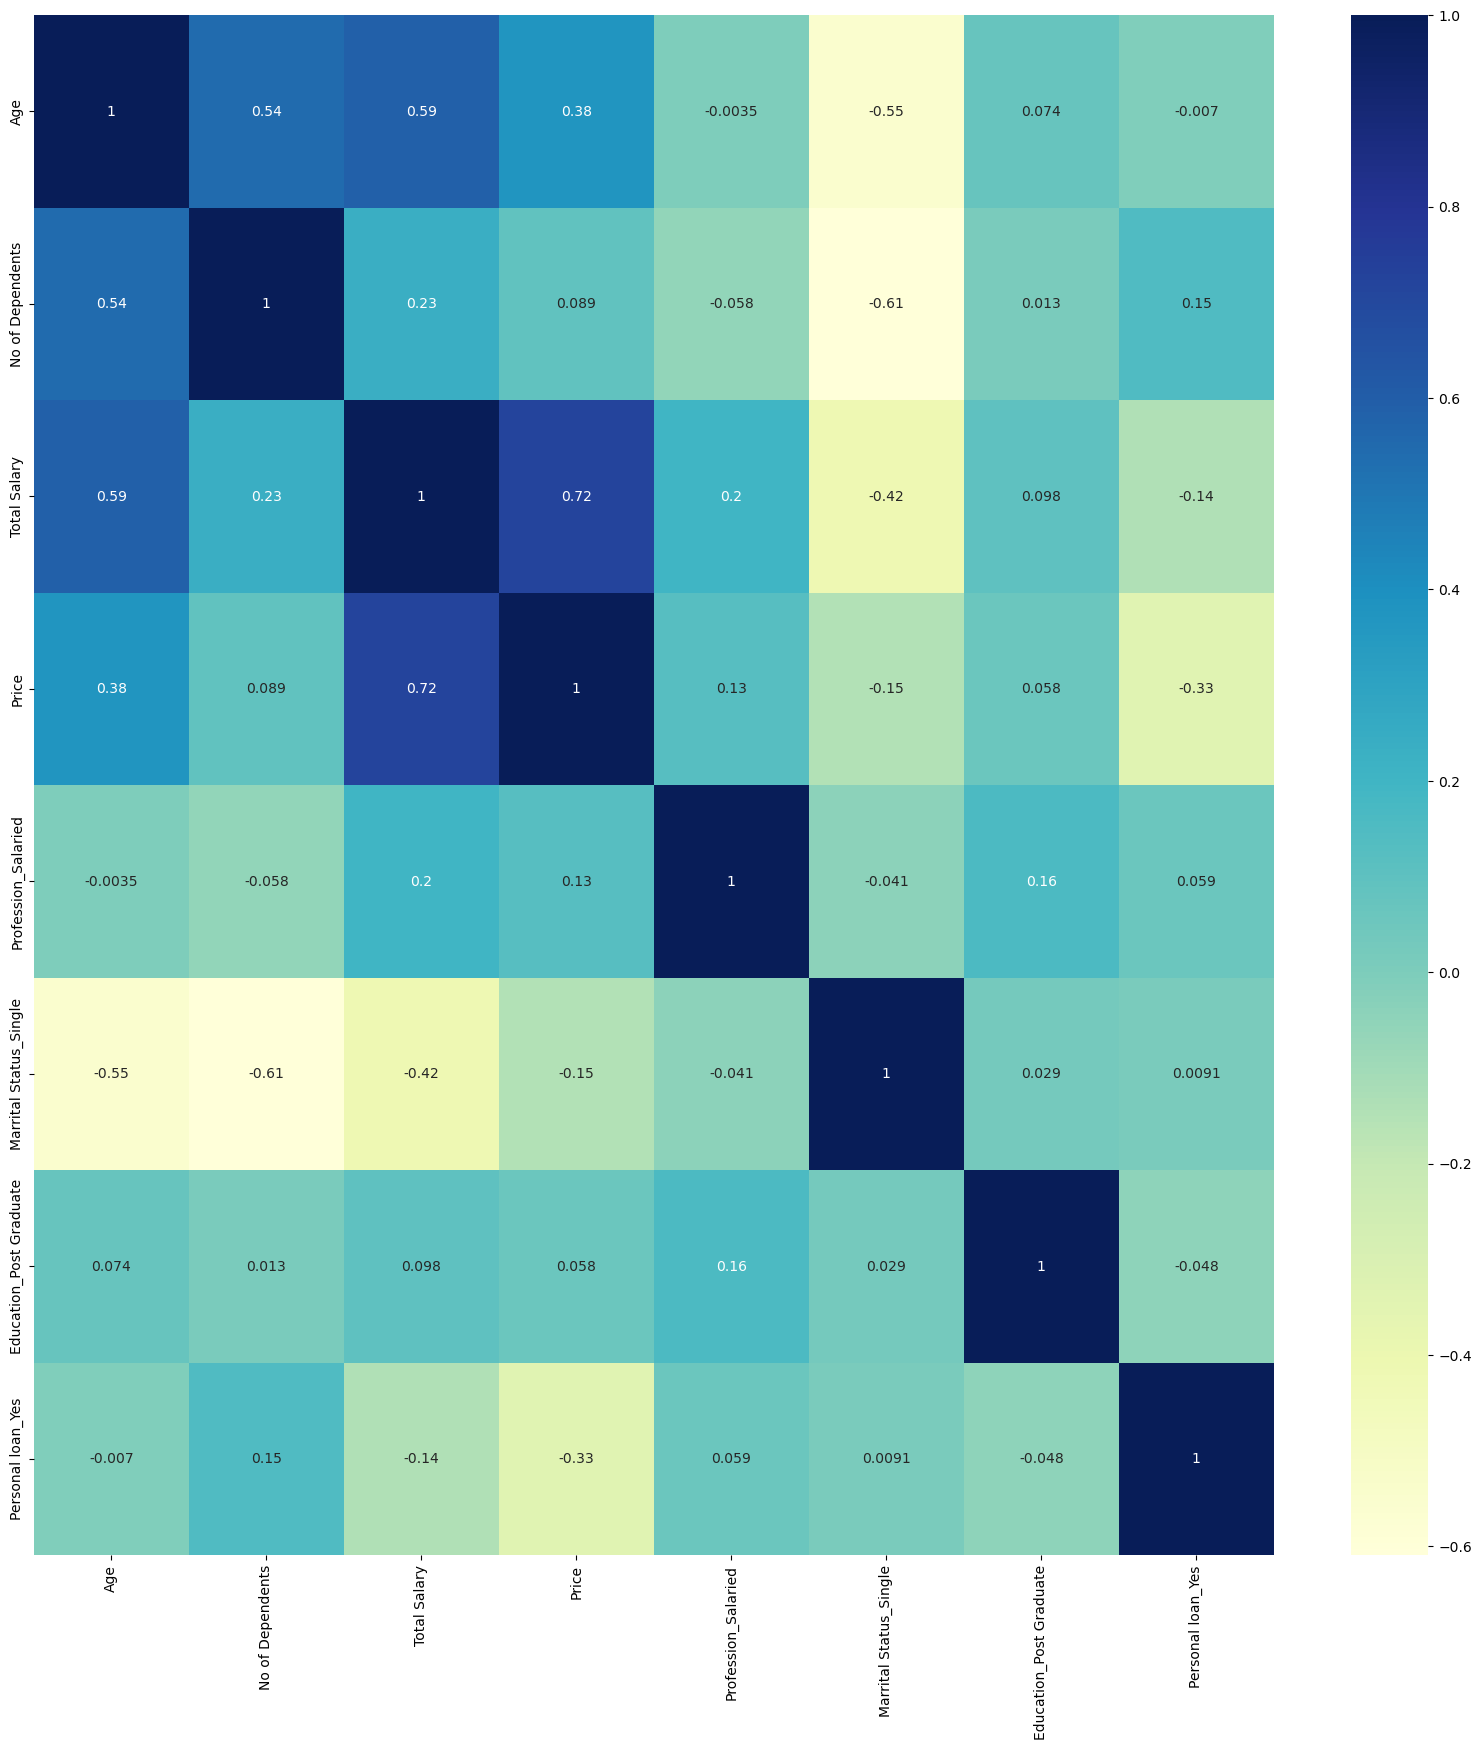

In [527]:
plt.figure(figsize=(20,20))
sns.heatmap(df3_conv.corr(),annot=True,cmap='YlGnBu')